# Tugas kecil II: Eksplorasi scikit-learn pada Jupyter Notebook

In [39]:
#Import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.Load dataset standar iris dan  dataset play-tennis(play-tennis dalam format csv)

In [40]:
#Load iris dataset
from sklearn.datasets import load_iris
dataset_iris = load_iris()
iris_feature_size = len(dataset_iris.feature_names) #Total number of features
iris_class_size = len(dataset_iris.target_names) #Total number of class
iris_feature_names = dataset_iris.feature_names #List of feature names
iris_class_names =  dataset_iris.target_names #List of class names

#Convert dataset_iris to numpy array
arr_data_iris = np.array(dataset_iris.data) #Instances without class attribute
arr_label_iris = np.array(dataset_iris.target) #class attribute
arr_iris = np.append(arr_data_iris,arr_label_iris[:,np.newaxis],1) #Instances with class atribute

#Convert array to data frames
df_iris = pd.DataFrame(arr_iris,columns=['sepal_length','sepal_width','petal_length','petal_width','CLASS']) #Data frame for iris dataset

print("IRIS dataset:\n")
print(df_iris.head(10))
print('class value: ',iris_class_names)
print('feature names:',iris_feature_names)

IRIS dataset:

   sepal_length  sepal_width  petal_length  petal_width  CLASS
0           5.1          3.5           1.4          0.2    0.0
1           4.9          3.0           1.4          0.2    0.0
2           4.7          3.2           1.3          0.2    0.0
3           4.6          3.1           1.5          0.2    0.0
4           5.0          3.6           1.4          0.2    0.0
5           5.4          3.9           1.7          0.4    0.0
6           4.6          3.4           1.4          0.3    0.0
7           5.0          3.4           1.5          0.2    0.0
8           4.4          2.9           1.4          0.2    0.0
9           4.9          3.1           1.5          0.1    0.0
class value:  ['setosa' 'versicolor' 'virginica']
feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
#Load play tennis dataset
path_play_tennis = 'dataset\play_tennis.csv'
df_play_tennis = pd.read_csv(path_play_tennis) #Load csv file to dataframe

#Preprocess data : from DataFrames with Categorical value, to Array with numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_encode = df_play_tennis.apply(le.fit_transform)
arr_ptennis = df_encode.reset_index().values[:,1:] #transform to array without index row number
arr_data_ptennis = arr_ptennis[:,0:4] #Instances without class attribute
arr_label_ptennis = arr_ptennis[:,4:] #class attribute

#Make list of class name and attributes name
ptennis_feature_size = arr_data_ptennis.shape[1] #Total number of features
ptennis_class_size = arr_label_ptennis.max()+1 #Total number of class
ptennis_attribute_class_name = df_play_tennis.columns[ptennis_feature_size] #Name of attribute class
ptennis_feature_names = list(df_play_tennis.columns.values[:ptennis_feature_size]) #List of features names
ptennis_class_names = list(set(df_play_tennis.loc[: , ptennis_attribute_class_name].values)) #List of class names

print('Play-Tennis dataset:\n')
print(df_play_tennis)
print('class value: ',ptennis_class_names)
print('feature names:',ptennis_feature_names)

Play-Tennis dataset:

     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no
class value:  ['yes', 'no']
feature names: ['outlook', 'temp', 'humidity', 'windy']


In [42]:
#CREATE CLASSIFIER DTL
from sklearn import tree
clf_dtl = tree.DecisionTreeClassifier()

#CREATE CLASSIFIER ANN
from sklearn.neural_network import MLPClassifier
clf_ann = MLPClassifier(solver='sgd',activation ='logistic',
                    learning_rate_init=0.07,hidden_layer_sizes=(5, 2), 
                    random_state=1,batch_size=1,max_iter=100,
                   momentum=0.7,alpha=0.001)
print()

## 2.Train iris dataset with Full training scheme and Show the training model
   ## (Using DTL and ANN)

In [43]:
#Train iris dataset with DecisionTreeClassifier
clf_dtl.fit(arr_data_iris,arr_label_iris)
score = clf_dtl.score(arr_data_iris,arr_label_iris)
print("Accuracy DTL on full training set: ",score)

#Print model
import graphviz
dot_data = tree.export_graphviz(clf_dtl,out_file=None, 
                         feature_names=iris_feature_names,  
                         class_names=iris_class_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)

Accuracy DTL on full training set:  1.0


In [44]:
#Train iris dataset with NeuralNetwork
clf_ann.fit(arr_data_iris,arr_label_iris)
score = clf_ann.score(arr_data_iris,arr_label_iris)
print("Accuracy ANN on full training set: ",score)

Accuracy ANN on full training set:  0.933333333333


## 3.Train iris dataset with Split_Train_Test Scheme (Using DTL and ANN)

In [45]:
#Using split train_test scheme
from sklearn.model_selection import train_test_split
iris_data_train, iris_data_test, iris_label_train, iris_label_test = train_test_split(arr_data_iris, 
                                                                                      arr_label_iris, 
                                                                                      test_size=0.1, 
                                                                                      shuffle=True,
                                                                                     random_state=42)

In [46]:
#Train iris dataset with DecisionTreeClassifier
clf_dtl.fit(iris_data_train,iris_label_train)

#Evaluate model using accuracy and confusion matrices
#Print accuracy on test set and training set
from sklearn.metrics import accuracy_score
print('Accuracy DTL on test set: ',clf_dtl.score(iris_data_test,iris_label_test))
print('Accuract DTL on training set: ',clf_dtl.score(iris_data_train,iris_label_train))
 
#Print confusion matrices
from sklearn.metrics import confusion_matrix
iris_label_predict = clf_dtl.predict(iris_data_test)
print('Class value: ',iris_class_names)
print('Confusion matrix:\n',confusion_matrix(iris_label_test,iris_label_predict))

from sklearn.metrics import precision_score
#print('precision: ',precision_score(iris_label_test,iris_label_predict,average=None))
from sklearn.metrics import recall_score
#print('recallL: ',recall_score(iris_label_test,iris_label_predict,average=None))

Accuracy DTL on test set:  1.0
Accuract DTL on training set:  1.0
Class value:  ['setosa' 'versicolor' 'virginica']
Confusion matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]


In [47]:
#Train iris dataset with NeuralNetwork
clf_ann.fit(iris_data_train,iris_label_train)

#Evaluate model using accuracy and confusion matrices
#Print accuracy on test set and training set
from sklearn.metrics import accuracy_score
print('Accuracy ANN on test set: ',clf_ann.score(iris_data_test,iris_label_test))
print('Accuract ANN on training set: ',clf_ann.score(iris_data_train,iris_label_train))

#Print confusion matrices
from sklearn.metrics import confusion_matrix
iris_label_predict = clf_ann.predict(iris_data_test)
print('Class value: ',iris_class_names)
print('Confusion matrix:\n',confusion_matrix(iris_label_test,iris_label_predict))

from sklearn.metrics import precision_score
#print('precision: ',precision_score(iris_label_test,iris_label_predict,average=None))
from sklearn.metrics import recall_score
#print('recallL: ',recall_score(iris_label_test,iris_label_predict,average=None))

Accuracy ANN on test set:  1.0
Accuract ANN on training set:  0.977777777778
Class value:  ['setosa' 'versicolor' 'virginica']
Confusion matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 3]]


## 4.Train iris dataset with 10-Fold-Cross-Validaiton Scheme (Using DTL and ANN)

In [48]:
#Train iris data set with Decision Tree
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_dtl, arr_data_iris, arr_label_iris, cv=10)
print("Accuracy DTL with 10-Fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy DTL with 10-Fold CV: 0.96 (+/- 0.09)


In [49]:
#Train iris data set with ANN
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_ann, arr_data_iris, arr_label_iris, cv=10)
print("Accuracy ANN with 10-Fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy ANN with 10-Fold CV: 0.81 (+/- 0.19)


## 5.Save model result to file external

In [50]:
# Save the model to disk
from sklearn.externals import joblib
dtl_model_path = 'model/dtl_model.sav'
ann_model_path = 'model/ann_model.sav'
joblib.dump(clf_dtl, dtl_model_path)
joblib.dump(clf_ann, ann_model_path)
print("DTL model saved at ",dtl_model_path)
print("ANN model saved at ",ann_model_path)

DTL model saved at  model/dtl_model.sav
ANN model saved at  model/ann_model.sav


## 6.Load saved model from file external

In [51]:
# Load model from disk
loaded_dtl_model = joblib.load(dtl_model_path)
loaded_ann_model = joblib.load(ann_model_path)
result_dtl = loaded_dtl_model.score(arr_data_iris,arr_label_iris)
result_ann = loaded_ann_model.score(arr_data_iris,arr_label_iris)
print("Accuracy loaded DTL model : ",result_dtl)
print("Accuracy loaded ANN model : ",result_ann)

Accuracy loaded DTL model :  1.0
Accuracy loaded ANN model :  0.98


## 7.Create new instances and classifying new instances

In [52]:
#Create new instance
new_iris_instance = [[7.9,4.4,6.9,2.5]]
print("Predict result with DTL: " ,iris_class_names[clf_dtl.predict(new_iris_instance)])
print("Predict result with ANN: " ,iris_class_names[clf_ann.predict(new_iris_instance)])

Predict result with DTL:  ['virginica']
Predict result with ANN:  ['virginica']


## 8. Visualize all feature with target class

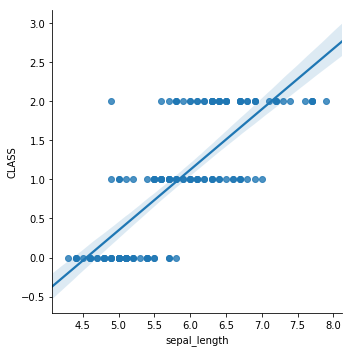

In [53]:
#Visualize featre seppal length with Class
import seaborn as sns
g = sns.lmplot(x=df_iris.columns[0], y=df_iris.columns[iris_feature_size], data=df_iris)

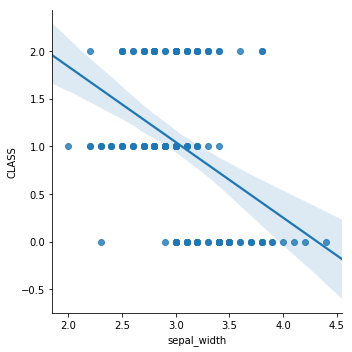

In [54]:
#Visualize feature seppal width with Class
g = sns.lmplot(x=df_iris.columns[1], y=df_iris.columns[iris_feature_size], data=df_iris)

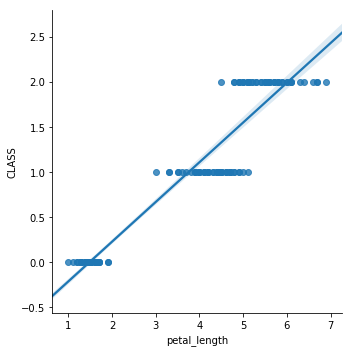

In [55]:
#Visualize feature petal length with Class
g = sns.lmplot(x=df_iris.columns[2], y=df_iris.columns[iris_feature_size], data=df_iris)

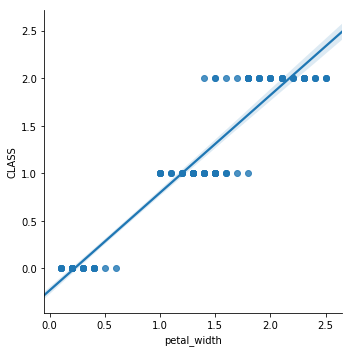

In [56]:
#Visualize feature petal width with class
g = sns.lmplot(x=df_iris.columns[3], y=df_iris.columns[iris_feature_size], data=df_iris)

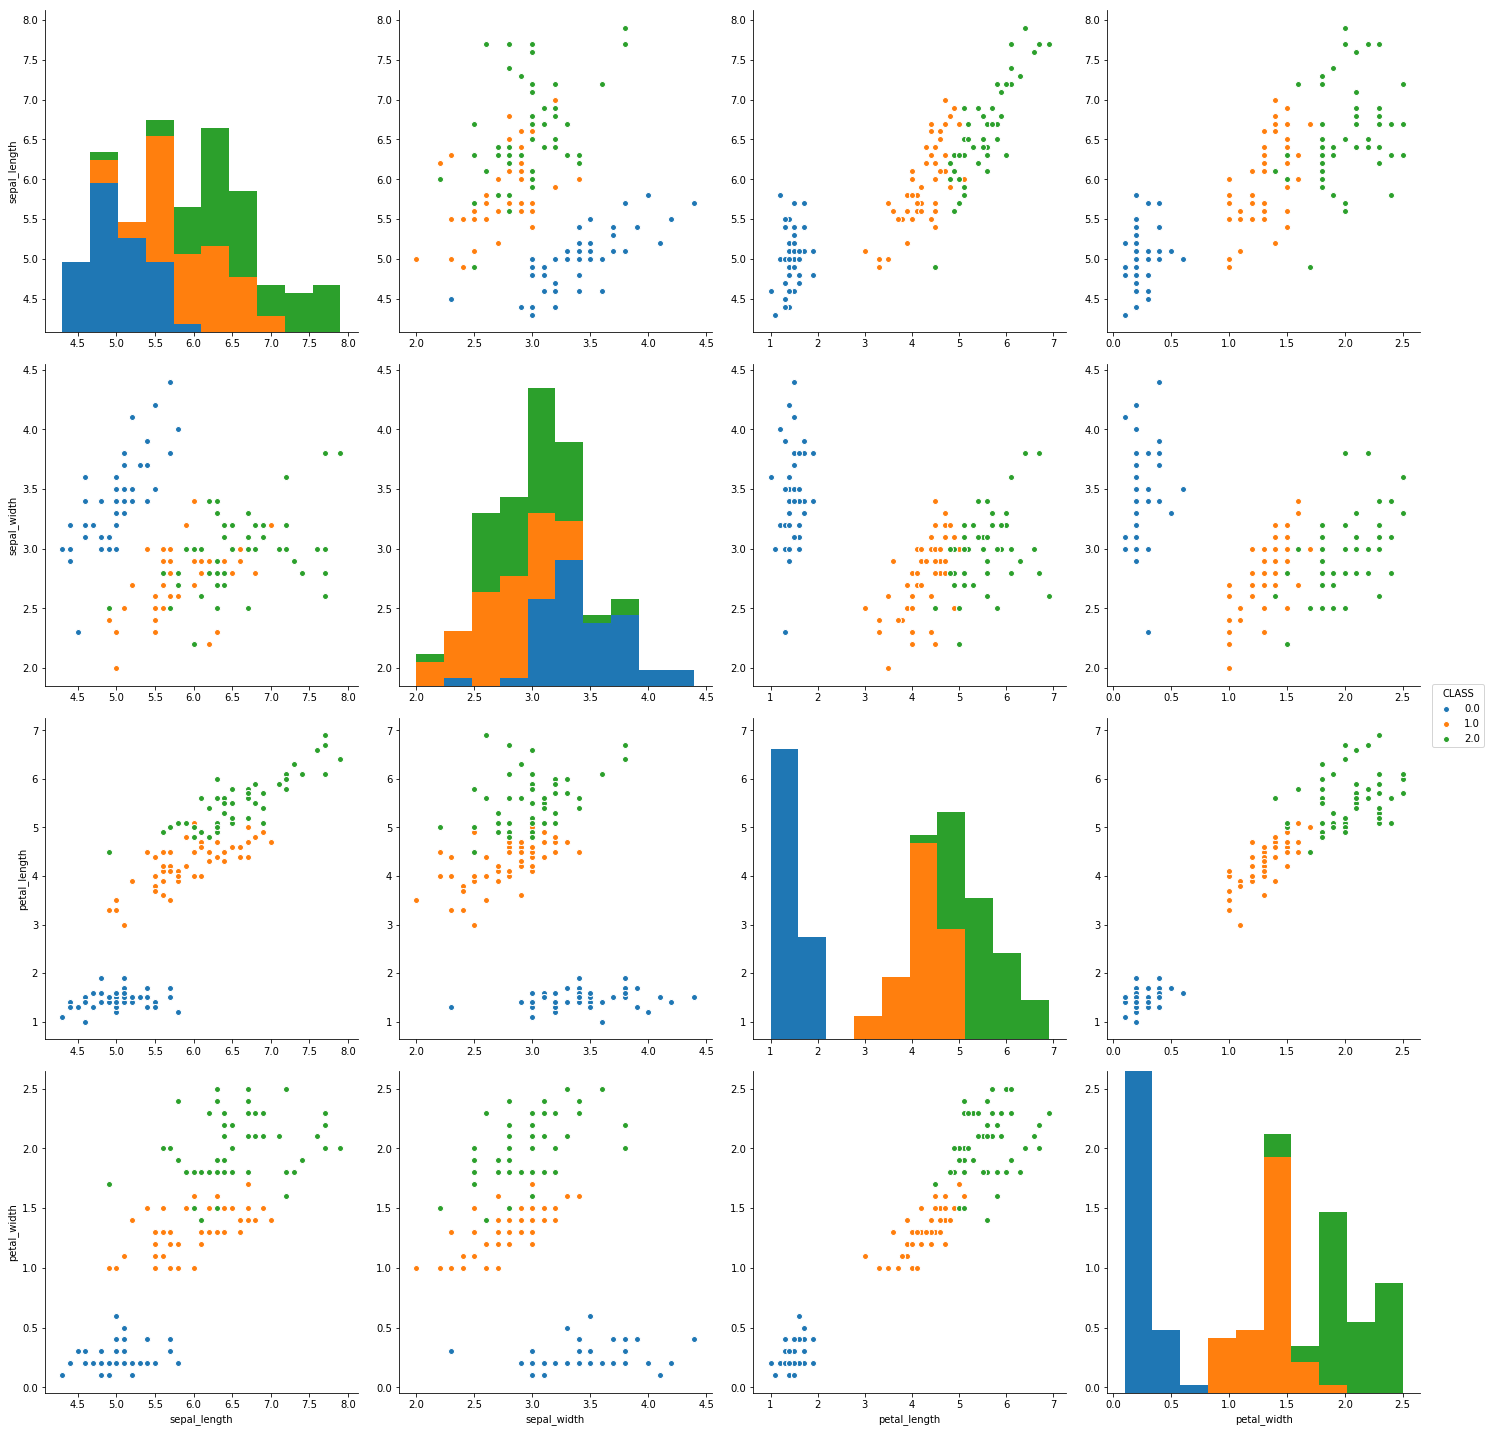

In [57]:
#Visualize between feature
sns.pairplot(df_iris, vars=['sepal_length','sepal_width','petal_length','petal_width'], hue=df_iris.columns[iris_feature_size], size=5)